* [PEP 465 -- A dedicated infix operator for matrix multiplication](https://www.python.org/dev/peps/pep-0465/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import linear_regression as lr  # my own module

%reload_ext autoreload
%autoreload 2
%matplotlib inline
sns.set(context="notebook", style="darkgrid", palette="dark")

In [2]:
alpha = 0.01
theta = np.zeros(2)
epoch = 500

In [3]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
data.insert(loc=0, column='ones', value=1) # x0 = 1, intercetpion dummy feature

data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


# compute cost
> take a look at the cost function in ex1.pdf, translate it into numpy computation

In [4]:
X = lr.get_X(data)
print(X.shape, type(X))

y = lr.get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [5]:
lr.compute_cost(X, y, theta)

32.072733877455669

# batch gradient decent
1. couldn't stop thinking in Matrix operation, will see if this tendency gives me something
2. look at the gradient batch gradient decent definition in the pdf

In [6]:
theta, cost = lr.batch_gradient_decent(X, y, theta, alpha, epoch)

# visualize them

In [7]:
# compute final cost
lr.compute_cost(X, y, theta)

4.7138095311168655

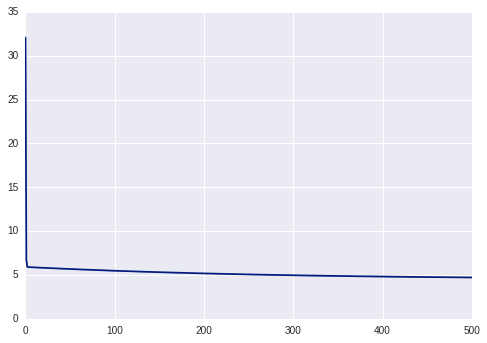

In [8]:
sns.tsplot(time=np.arange(len(cost)), data = cost)

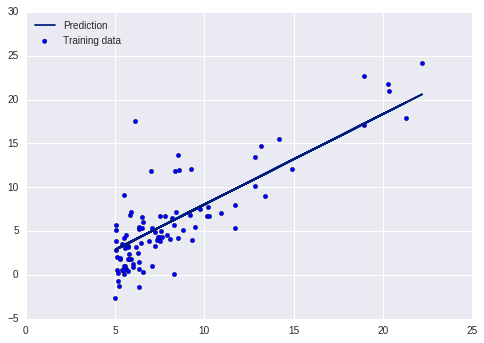

In [9]:
b = theta[0] # intercept
m = theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)